xtrain, x_test, y_train, y_test = train_test_split(sample, label, test_size, train_size, random_state, suffle, stratify)
   - 같은 크기의 Numpy 배열 2개를 지정된 비율로 나눠서 반환
   - test_size = 0.25 : 0.0~1.0 테스트 데이터셋 비율
   - train_size = None : 0.0~1.0 훈련 데이터셋 비율
   - random_state = None : 정수 값, 난수 발생의 시드(seed) 값
   - shuffle = True : boolean 값을 전달해서 섞을지 말지 결정
   - stratify : y의 지정한 데이터 비율을 유지(층화추출), y가 범주형일 때 사용함 
   - 예) 레이블 y가 0,1로 이루어진 binary이고, 비율이 25:75일 때, stratify=y이면 데이터셋도 0,1을 같은 비율로 유지함

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

iris = pd.read_csv('data_05/iris.csv')

# 데이터 탐색 (결측치 확인, 이상치 확인, 데이터 타입 확인, 통계값 확인(var=0), nunique() == 1, ...)
# 데이터 탐색 (그래프, groupby,pivot_table, value_counts, corr, ...)

X = iris.iloc[:, :-1]  # iris.drop(columns='target')
y = iris['target']
A = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
x_train, x_test, y_train, y_test = A
print(x_train.shape, x_test.shape,  y_train.shape, y_test.shape)


(120, 4) (30, 4) (120,) (30,)


In [4]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
print('학습 데이터 성능 :', model.score(x_train, y_train) )
print('평가 데이터 성능 :', model.score(x_test, y_test))
print('평가 데이터        :', y_test.to_numpy())
print('평가 데이터 예측값 :', model.predict(x_test))

학습 데이터 성능 : 0.95
평가 데이터 성능 : 1.0
평가 데이터        : [0 1 0 2 0 1 2 0 0 1 2 1 1 2 1 2 2 1 1 0 0 2 2 2 0 1 1 2 0 0]
평가 데이터 예측값 : [0 1 0 2 0 1 2 0 0 1 2 1 1 2 1 2 2 1 1 0 0 2 2 2 0 1 1 2 0 0]


그래프 그리기

In [ ]:
이유: 연속형 데이터의 경우, 정규분포일 때 학습 효율이 좋다
그래서, 각 컬럼의 분포를 확인하기 위해 histogram을 그려본다
현상 : 결과를 보면 대 부분의 컬럼이 양의 왜도를 갖는 것을 볼 수 있다
대책 : 정규분포로 변환하는 작업을 취해 성능에 향상이 있는지 확인해 볼 필요가 있다

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

wine = pd.read_csv('wine.csv')
wine.head(2)

,산도,향,신선함,단 맛,짠 맛,황 화합물1,황 화합물2,무게감,신 맛,황 화합물3,알코올,품질,유형
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red


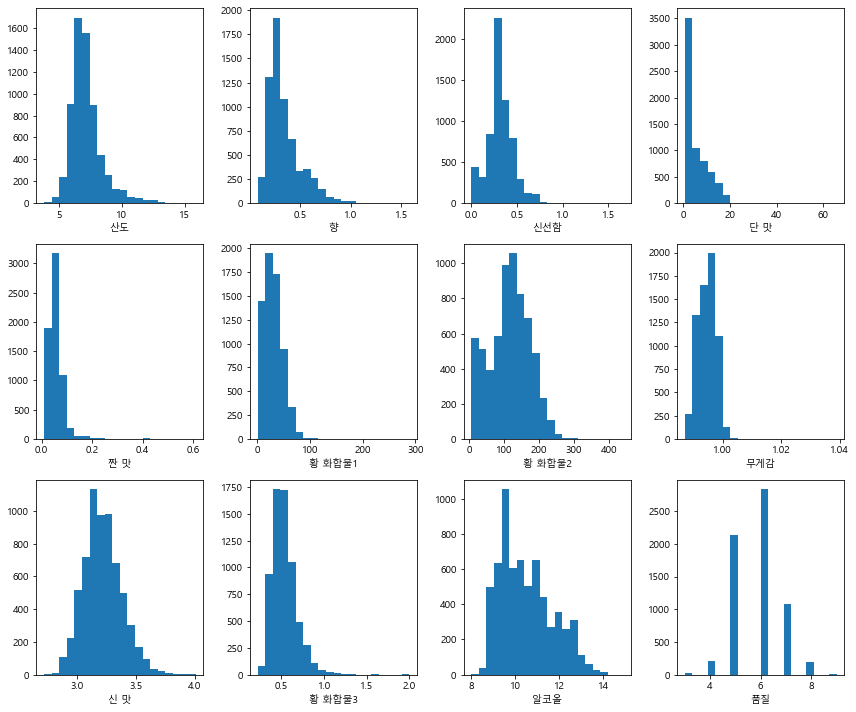

In [9]:
# subplot을 사용한 히스토그램 그리기
plt.figure(figsize=(12, 10))
for i, feature in enumerate(wine.columns[:-1], start=1):
    plt.subplot(3, 4, i)
    plt.hist(wine[feature], bins=20)
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

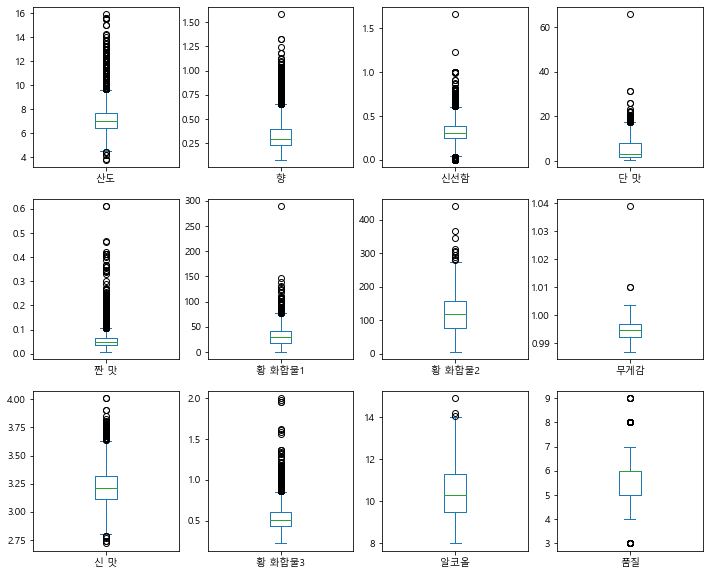

In [10]:
# df의 subplots=True를 사용한 boxplot  그리기
wine.plot.box(subplots=True, layout=(3, 4), figsize=(12,10))
plt.show()

In [ ]:
# 실제 사용 - (모델링에 사용한 데이터셋과 같은 상태어야 함)
# 컬럼의 개수, 순서, 단위, 분포
# 전처리 방법(스케일러, 엔코더, 주성분분석 ..., log, sqrt, boxcox)
# scaler => transform
# model.predict(new_data)

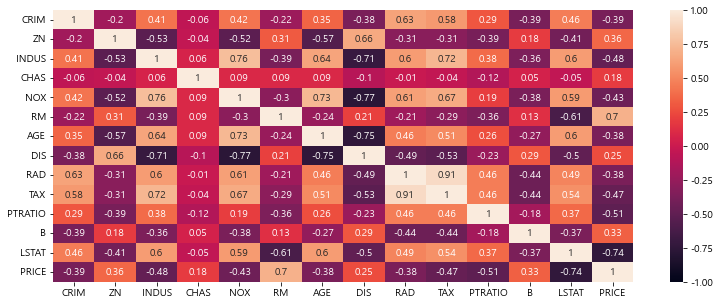

In [11]:
plt.figure(figsize=(13, 5))
sns.heatmap(df.corr().round(2), vmin=-1.0, annot=True)
plt.show()

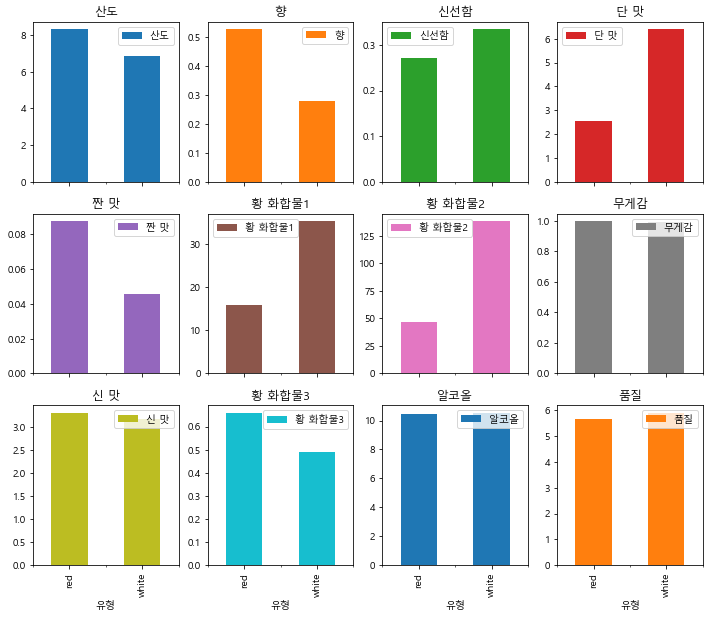

In [13]:
df_cat = wine.groupby(by='유형').mean()
df_cat.plot.bar(subplots=True, layout=(3,4), figsize=(12, 10))
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data_05/boston.csv')

# 전처리, 탐색

X = df.loc[:, 'CRIM':'LSTAT']
y = df['PRICE']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.25,
                                                    random_state=1)
print([x.shape for x in [x_train, x_test, y_train, y_test]])

model = LinearRegression().fit(x_train, y_train)
print('학습 데이터 성능 : %.4f' % model.score(x_train, y_train))
print('평가 데이터 성능 : %.4f' % model.score(x_test, y_test))
y_pred = model.predict(x_test)
y_pred[:10]

[(379, 13), (127, 13), (379,), (127,)]
학습 데이터 성능 : 0.7168
평가 데이터 성능 : 0.7789


array([32.37816533, 27.95684437, 18.07213891, 21.63166556, 18.93029508,
       19.96277202, 32.2834674 , 18.06715668, 24.72989076, 26.85359369])

In [ ]:
# Ridge, Lasso, PolynomialFeature 는 짧은 시간에 사용하기는 어려움이 있으므로 시험에서는 비추합니다

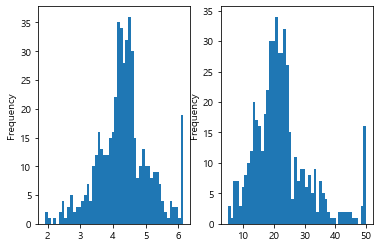

In [16]:
# [TIP] Boxcox 변환
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html?highlight=boxcox#scipy.stats.boxcox
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.inv_boxcox.html

# 정규분포로 변환할 때 사용할 수 있는 방법 (boxcox)
# Y값을 변환한 경우에는 predict 값을 inv_boxcox로 변환해서 원래 값을 예측값으로 해주어야 함
from scipy import stats
import scipy

price, optimal_lambda = stats.boxcox(df['PRICE'])
plt.subplot(1,2,1)
pd.Series(price).plot.hist(bins=50)

org_price = scipy.special.inv_boxcox(price, optimal_lambda)
plt.subplot(1,2,2)
pd.Series(org_price).plot.hist(bins=50)
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats
import scipy

df = pd.read_csv('data_05/boston.csv')

# 전처리, 탐색

X = df.loc[:, 'CRIM':'LSTAT']
y = df['PRICE']
y_price, optimal_lambda = stats.boxcox(df['PRICE'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_price,
                                                    test_size=0.25,
                                                    random_state=1)
print([x.shape for x in [x_train, x_test, y_train, y_test]])

model = LinearRegression().fit(x_train, y_train)
print('학습 데이터 성능 : %.4f' % model.score(x_train, y_train))
print('평가 데이터 성능 : %.4f' % model.score(x_test, y_test))

y_pred = model.predict(x_test)
y_pred_price = scipy.special.inv_boxcox(y_pred, optimal_lambda)
y_pred_price[:10]

[(379, 13), (127, 13), (379,), (127,)]
학습 데이터 성능 : 0.7745
평가 데이터 성능 : 0.8038


array([31.56827858, 26.61935812, 18.05486381, 22.03692633, 18.94158382,
       19.19981325, 31.55850022, 17.99076109, 23.53969767, 26.02447036])